In [28]:
tKey = 'YOUR_TIINGO_KEY'
%matplotlib inline
import pandas as pd
import pandas_datareader.tiingo as tiingo
import datetime

# last trade day from previous year
# TODO: auto calculate
dStrLastYearClose = '12/31/2018'

# get the current date
d = datetime.datetime.today()
# convert to string format
dStrToday = d.strftime('%m/%d/%Y')
dStrYearStart = d.strftime('01/01/%Y')

# tickers of all peers
peers = ['CRZO','CDEV','DNR','LPI','OAS','PDCE','PE','RRC','SM','SWN','WLL','WPX','XEC']

# fetch the stock data
dr = tiingo.TiingoDailyReader(symbols=peers, start=dStrLastYearClose, end=dStrToday, api_key=tKey)
df = dr.read()
dr.close()

# show some stats on the data
df.describe()

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
count,520.000000,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000,520.0,5.200000e+02
mean,18.074767,18.411541,17.668075,18.006340,6.159148e+06,18.085019,0.000346,18.421913,17.678127,18.016529,1.0,6.159148e+06
std,18.095398,18.330301,17.768455,18.011581,5.056756e+06,18.125904,0.007894,18.361045,17.798370,18.041850,0.0,5.056756e+06
min,1.710000,1.780000,1.600000,1.650000,6.352690e+05,1.710000,0.000000,1.780000,1.600000,1.650000,1.0,6.352690e+05
25%,5.892500,6.032500,5.760000,5.847500,2.570019e+06,5.892500,0.000000,6.032500,5.760000,5.847500,1.0,2.570019e+06
50%,12.525000,12.782500,12.275000,12.480000,4.724221e+06,12.525000,0.000000,12.782500,12.275000,12.480000,1.0,4.724221e+06
75%,19.635000,19.902275,19.067500,19.475000,8.279120e+06,19.635000,0.000000,19.902275,19.067500,19.475000,1.0,8.279120e+06
max,76.420000,76.915083,75.189233,76.166882,3.783066e+07,76.420000,0.180000,77.100000,75.370000,76.350000,1.0,3.783066e+07


In [2]:
# show column info
df.columns

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'close',
       'divCash', 'high', 'low', 'open', 'splitFactor', 'volume'],
      dtype='object')

In [3]:
# filter data down to adjusted close price
df_close = df.loc[peers,['adjClose']]

df_close.head()

adjClose
symbol date                
CRZO   2018-12-31     11.29
       2019-01-02     11.51
       2019-01-03     11.45
       2019-01-04     12.18
       2019-01-07     12.54

In [4]:
# pivot the data
df_pivot = pd.pivot_table(df_close, index='date', columns='symbol',values="adjClose")

df_pivot.head(10)

symbol,CDEV,CRZO,DNR,LPI,OAS,PDCE,PE,RRC,SM,SWN,WLL,WPX,XEC
date,,,,,,,,,,,,,
2018-12-31,11.02,11.29,1.71,3.62,5.53,29.76,15.98,9.57,15.48,3.41,22.69,11.35,61.502139
2019-01-02,11.30,11.51,1.96,3.74,5.54,30.42,16.22,9.96,15.34,3.72,22.69,11.63,62.559596
2019-01-03,11.28,11.45,1.97,3.66,5.64,30.96,16.15,9.95,15.32,3.64,22.80,11.54,61.691683
2019-01-04,11.81,12.18,2.19,3.99,6.04,32.71,16.88,10.69,16.63,3.90,24.77,12.13,64.774272
2019-01-07,12.68,12.54,2.20,4.12,6.18,34.25,18.12,11.13,17.48,4.07,26.65,12.87,66.200842
2019-01-08,12.89,12.49,2.19,4.17,6.42,34.02,18.74,11.00,17.96,4.11,27.18,12.93,67.268276
2019-01-09,13.22,12.93,2.23,4.19,6.58,34.04,19.19,11.60,18.78,4.37,28.63,13.06,68.545206
2019-01-10,13.21,12.64,2.29,4.18,6.59,33.99,19.01,11.44,19.44,4.30,28.67,13.18,70.291009
2019-01-11,13.03,12.24,2.17,4.01,6.33,33.57,18.72,11.50,19.31,4.35,27.47,12.85,70.470577


In [5]:
# Close price at end of previous year
df_pivot.iloc[0,:]

symbol
CDEV    11.020000
CRZO    11.290000
DNR      1.710000
LPI      3.620000
OAS      5.530000
PDCE    29.760000
PE      15.980000
RRC      9.570000
SM      15.480000
SWN      3.410000
WLL     22.690000
WPX     11.350000
XEC     61.502139
Name: 2018-12-31 00:00:00, dtype: float64

In [6]:
# Latest price at close
df_pivot.iloc[-1,:]

symbol
CDEV     9.66
CRZO    11.30
DNR      2.05
LPI      3.48
OAS      5.91
PDCE    37.14
PE      18.62
RRC     10.36
SM      16.65
SWN      4.29
WLL     25.01
WPX     12.59
XEC     72.64
Name: 2019-02-27 00:00:00, dtype: float64

In [21]:
# Calculate YTD performance
perf_ytd = (df_pivot / df_pivot.iloc[0,:]) - 1

perf_ytd

symbol,CDEV,CRZO,DNR,LPI,OAS,PDCE,PE,RRC,SM,SWN,WLL,WPX,XEC
date,,,,,,,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.025408,0.019486,0.146199,0.033149,0.001808,0.022177,0.015019,0.040752,-0.009044,0.090909,0.000000,0.024670,0.017194
2019-01-03,0.023593,0.014172,0.152047,0.011050,0.019892,0.040323,0.010638,0.039707,-0.010336,0.067449,0.004848,0.016740,0.003082
2019-01-04,0.071688,0.078831,0.280702,0.102210,0.092224,0.099126,0.056320,0.117032,0.074289,0.143695,0.091670,0.068722,0.053204
2019-01-07,0.150635,0.110717,0.286550,0.138122,0.117541,0.150874,0.133917,0.163009,0.129199,0.193548,0.174526,0.133921,0.076399
2019-01-08,0.169691,0.106289,0.280702,0.151934,0.160940,0.143145,0.172716,0.149425,0.160207,0.205279,0.197885,0.139207,0.093755
2019-01-09,0.199637,0.145261,0.304094,0.157459,0.189873,0.143817,0.200876,0.212121,0.213178,0.281525,0.261789,0.150661,0.114517
2019-01-10,0.198730,0.119575,0.339181,0.154696,0.191682,0.142137,0.189612,0.195402,0.255814,0.260997,0.263552,0.161233,0.142903
2019-01-11,0.182396,0.084145,0.269006,0.107735,0.144665,0.128024,0.171464,0.201672,0.247416,0.275660,0.210665,0.132159,0.145823


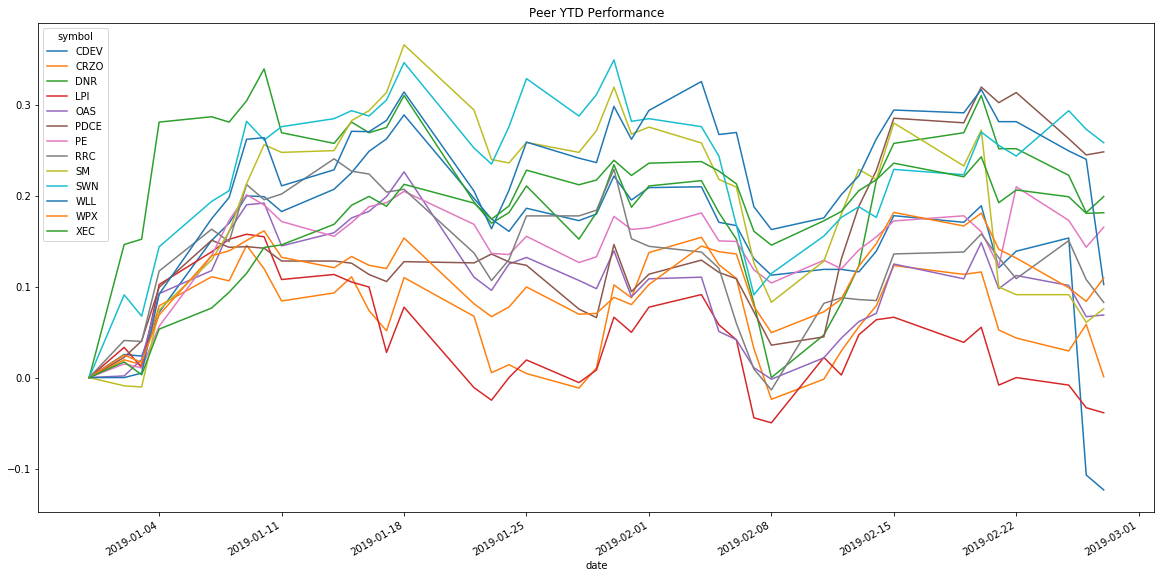

In [34]:
perf_ytd.plot(title='Peer YTD Performance', figsize=(20,10))

In [23]:
# Daily performance
perf_daily = df_pivot.pct_change(1)

perf_daily

symbol,CDEV,CRZO,DNR,LPI,OAS,PDCE,PE,RRC,SM,SWN,WLL,WPX,XEC
date,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.025408,0.019486,0.146199,0.033149,0.001808,0.022177,0.015019,0.040752,-0.009044,0.090909,0.000000,0.024670,0.017194
2019-01-03,-0.001770,-0.005213,0.005102,-0.021390,0.018051,0.017751,-0.004316,-0.001004,-0.001304,-0.021505,0.004848,-0.007739,-0.013873
2019-01-04,0.046986,0.063755,0.111675,0.090164,0.070922,0.056525,0.045201,0.074372,0.085509,0.071429,0.086404,0.051127,0.049968
2019-01-07,0.073666,0.029557,0.004566,0.032581,0.023179,0.047080,0.073460,0.041160,0.051112,0.043590,0.075898,0.061006,0.022024
2019-01-08,0.016562,-0.003987,-0.004545,0.012136,0.038835,-0.006715,0.034216,-0.011680,0.027460,0.009828,0.019887,0.004662,0.016124
2019-01-09,0.025601,0.035228,0.018265,0.004796,0.024922,0.000588,0.024013,0.054545,0.045657,0.063260,0.053348,0.010054,0.018983
2019-01-10,-0.000756,-0.022428,0.026906,-0.002387,0.001520,-0.001469,-0.009380,-0.013793,0.035144,-0.016018,0.001397,0.009188,0.025469
2019-01-11,-0.013626,-0.031646,-0.052402,-0.040670,-0.039454,-0.012357,-0.015255,0.005245,-0.006687,0.011628,-0.041856,-0.025038,0.002555
